In [1]:
import algo
import datamodel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [29]:
fname = "Data/prices_round_1_day_-2.csv"
output = pd.read_csv(fname, index_col=False, sep=";")
times = output['timestamp'].unique()
products = output['product'].unique()
mtm_value = pd.DataFrame(index = output['timestamp'].unique())

In [30]:
mtm_value.index.name = 'Time'
mtm_value['Cash'] = 0
mtm_value['Value'] = 0
for product in products:
    mtm_value["Cash_"+product]=0
    mtm_value["Value_"+product]=0
position = {}
trader = algo.Trader()
for time in times:
    print(time)
    listings = {}
    order_depths = {}
    own_trades = {}
    market_trades = {}
    observations = {}
    for product in products:
        # print(data)
        depth = datamodel.OrderDepth()
        data = output[:][(output['timestamp']  ==time)& (output['product']==product)]
        try:
            depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"]), int(data["bid_price_3"]):int(data["bid_volume_3"])}
        except:
            try:
                depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"])}
            except:
                depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"])}
        try:
            depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"]), int(data["ask_price_3"]):-int(data["ask_volume_3"])}
        except:
            try:
                depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"])}
            except:
                depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"])}
        order_depths[product] = depth
    state = datamodel.TradingState(
                 timestamp= time,
                 listings= listings,
                 order_depths= order_depths,
                 own_trades= own_trades,
                 market_trades= market_trades,
                 position= position,
                 observations= observations)
    trades = trader.run(state = state)
    # breakdown by product
    cash_bd = {}
    value_bd = {}
    for product in products:
        cash_bd[product]= mtm_value.loc[time]['Cash_'+product]
    for trade in trades:
        if trade not in position:
            try:
                position[trade] =  trades[trade][0].quantity
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
        else:
            try:
                position[trade] += trades[trade][0].quantity
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
    # breakdown by product
    for product in products:
        value_bd[product]= cash_bd[product]
    # mtm valuation using best price to have no net assets
    for asset, pos in position.items():
        if pos<0:
            value_bd[asset] += pos*min(order_depths[asset].sell_orders.keys())
        if pos>0:
            value_bd[asset] += pos*max(order_depths[asset].sell_orders.keys())

    mtm_value.loc[time]['Value'] = sum(value_bd.values())
    mtm_value.loc[time]['Cash'] = sum(cash_bd.values())
    for product in products:
        mtm_value.loc[time]['Cash_'+product] = cash_bd[product]
        mtm_value.loc[time]['Value_'+product] = value_bd[product]
    try:
        mtm_value.loc[time+100]['Cash'] = mtm_value.loc[time]['Cash']
        mtm_value.loc[time+100]['Value'] = mtm_value.loc[time]['Cash']
        for product in products:
            mtm_value.loc[time+100]['Cash_'+product] = cash_bd[product]
            mtm_value.loc[time+100]['Value_'+product] = cash_bd[product]
    except:
        continue
    #print(trades)

        # print(time, product, data)

0
delta 4951.4 4955.0
delta 4951.4 4955.0
SELL BANANAS 20x 4997
100
delta 4951.933333333333 4958.0
delta 4951.933333333333 4958.0
200
delta 4952.533333333334 4961.6
delta 4952.533333333334 4961.6
300
delta 4953.133333333333 4965.066666666667
delta 4953.133333333333 4965.066666666667
400
delta 4953.711111111111 4968.4
delta 4953.711111111111 4968.4
BUY PEARLS 3x 9998
500
delta 4954.3 4971.866666666667
delta 4954.3 4971.866666666667
600
delta 4954.9 4975.4
delta 4954.9 4975.4
700
delta 4955.5 4978.933333333333
delta 4955.5 4978.933333333333
800
delta 4956.1 4982.4
delta 4956.1 4982.4
900
delta 4956.711111111111 4985.866666666667
delta 4956.711111111111 4985.866666666667
1000
delta 4957.3 4989.4
delta 4957.3 4989.4
SELL PEARLS 1x 10002
1100
delta 4957.888888888889 4992.866666666667
delta 4957.888888888889 4992.866666666667
1200
delta 4958.488888888889 4996.333333333333
delta 4958.488888888889 4996.333333333333
1300
delta 4959.0888888888885 4999.933333333333
delta 4959.0888888888885 4999.9

In [16]:
# fname = "Data/prices_round_1_day_-2.csv"
# output = pd.read_csv(fname, index_col=False, sep=";")
# times = output['timestamp'].unique()
# products = output['product'].unique()
# mtm_value = pd.DataFrame(index = output['timestamp'].unique())
days = list(range(-2, -1))
outputs = {}
class Data:
    def __init__(self, df):
        self.output = df
        self.times = df['timestamp'].unique()
        self.products = df['product'].unique()
        self.mtm_value = pd.DataFrame(index = df['timestamp'].unique())
        self.mtm_value.index.name = 'Time'
        self.mtm_value['Cash'] = 0
        self.mtm_value['Value'] = 0
        for product in self.products:
            self.mtm_value["Cash_"+product]=0
            self.mtm_value["Value_"+product]=0
for day in days:
    fname = f"Data/prices_round_1_day_{day}.csv"
    df = pd.read_csv(fname, index_col=False, sep=";")
    outputs[day] = Data(df)

In [18]:
for output in outputs.values():
    position = {}
    trader = algo.Trader()
    for time in output.times:
        print(time)
        listings = {}
        order_depths = {}
        own_trades = {}
        market_trades = {}
        observations = {}
        for product in output.products:
            # print(data)
            depth = datamodel.OrderDepth()
            data = output.output[:][(output.output['timestamp']  ==time)& (output.output['product']==product)]
            try:
                depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"]), int(data["bid_price_3"]):int(data["bid_volume_3"])}
            except:
                try:
                    depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"]), int(data["bid_price_2"]):int(data["bid_volume_2"])}
                except:
                    depth.buy_orders = {int(data["bid_price_1"]):int(data["bid_volume_1"])}
            try:
                depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"]), int(data["ask_price_3"]):-int(data["ask_volume_3"])}
            except:
                try:
                    depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"]), int(data["ask_price_2"]):-int(data["ask_volume_2"])}
                except:
                    depth.sell_orders = {int(data["ask_price_1"]):-int(data["ask_volume_1"])}
            order_depths[product] = depth
        state = datamodel.TradingState(
                    timestamp= time,
                    listings= listings,
                    order_depths= order_depths,
                    own_trades= own_trades,
                    market_trades= market_trades,
                    position= position,
                    observations= observations)
        trades = trader.run(state = state)
        # breakdown by product
        cash_bd = {}
        value_bd = {}
        for product in products:
            cash_bd[product]= output.mtm_value.loc[time]['Cash_'+product]
        for trade in trades:
            if trade not in position:
                try:
                    position[trade] =  trades[trade][0].quantity
                    cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
                except:
                    continue
            else:
                try:
                    position[trade] += trades[trade][0].quantity
                    cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
                except:
                    continue
        # breakdown by product
        for product in products:
            value_bd[product]= cash_bd[product]
        # mtm valuation using best price to have no net assets
        for asset, pos in position.items():
            if pos<0:
                value_bd[asset] += pos*min(order_depths[asset].sell_orders.keys())
            if pos>0:
                value_bd[asset] += pos*max(order_depths[asset].sell_orders.keys())

        output.mtm_value.loc[time]['Value'] = sum(value_bd.values())
        output.mtm_value.loc[time]['Cash'] = sum(cash_bd.values())
        for product in products:
            output.mtm_value.loc[time]['Cash_'+product] = cash_bd[product]
            output.mtm_value.loc[time]['Value_'+product] = value_bd[product]
        try:
            output.mtm_value.loc[time+100]['Cash'] = output.mtm_value.loc[time]['Cash']
            output.mtm_value.loc[time+100]['Value'] = output.mtm_value.loc[time]['Cash']
            for product in products:
                output.mtm_value.loc[time+100]['Cash_'+product] = cash_bd[product]
                output.mtm_value.loc[time+100]['Value_'+product] = cash_bd[product]
        except:
            continue

0
delta 4951.4 4955.0
delta 4951.4 4955.0
SELL BANANAS 20x 4997
100
delta 4951.933333333333 4958.0
delta 4951.933333333333 4958.0
200
delta 4952.533333333334 4961.6
delta 4952.533333333334 4961.6
300
delta 4953.133333333333 4965.066666666667
delta 4953.133333333333 4965.066666666667
400
delta 4953.711111111111 4968.4
delta 4953.711111111111 4968.4
BUY PEARLS 3x 9998
500
delta 4954.3 4971.866666666667
delta 4954.3 4971.866666666667
600
delta 4954.9 4975.4
delta 4954.9 4975.4
700
delta 4955.5 4978.933333333333
delta 4955.5 4978.933333333333
800
delta 4956.1 4982.4
delta 4956.1 4982.4
900
delta 4956.711111111111 4985.866666666667
delta 4956.711111111111 4985.866666666667
1000
delta 4957.3 4989.4
delta 4957.3 4989.4
SELL PEARLS 1x 10002
1100
delta 4957.888888888889 4992.866666666667
delta 4957.888888888889 4992.866666666667
1200
delta 4958.488888888889 4996.333333333333
delta 4958.488888888889 4996.333333333333
1300
delta 4959.0888888888885 4999.933333333333
delta 4959.0888888888885 4999.9

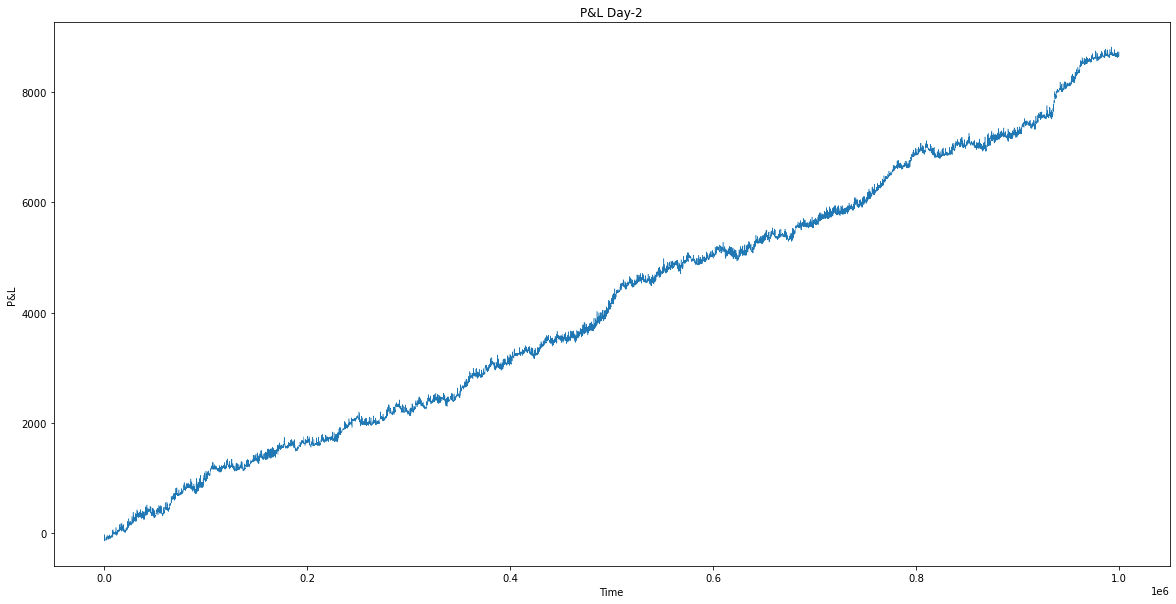

In [25]:
for day, data in outputs.items():
    plt.plot(data.mtm_value['Value'] , linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('P&L')
    plt.title('P&L Day' + str(day))
    plt.show()

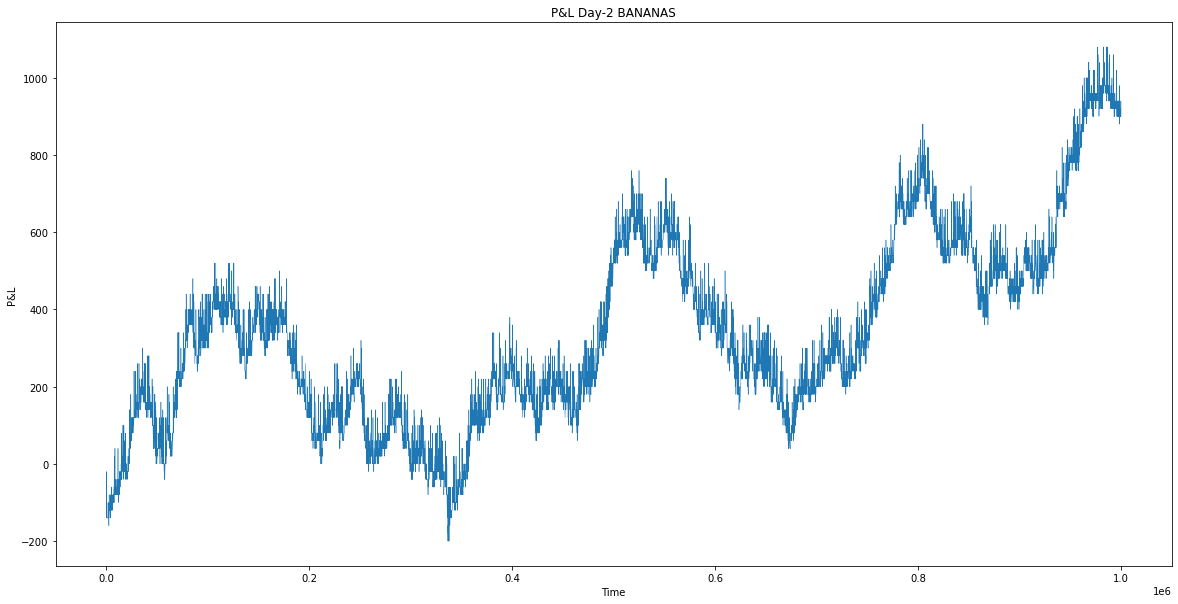

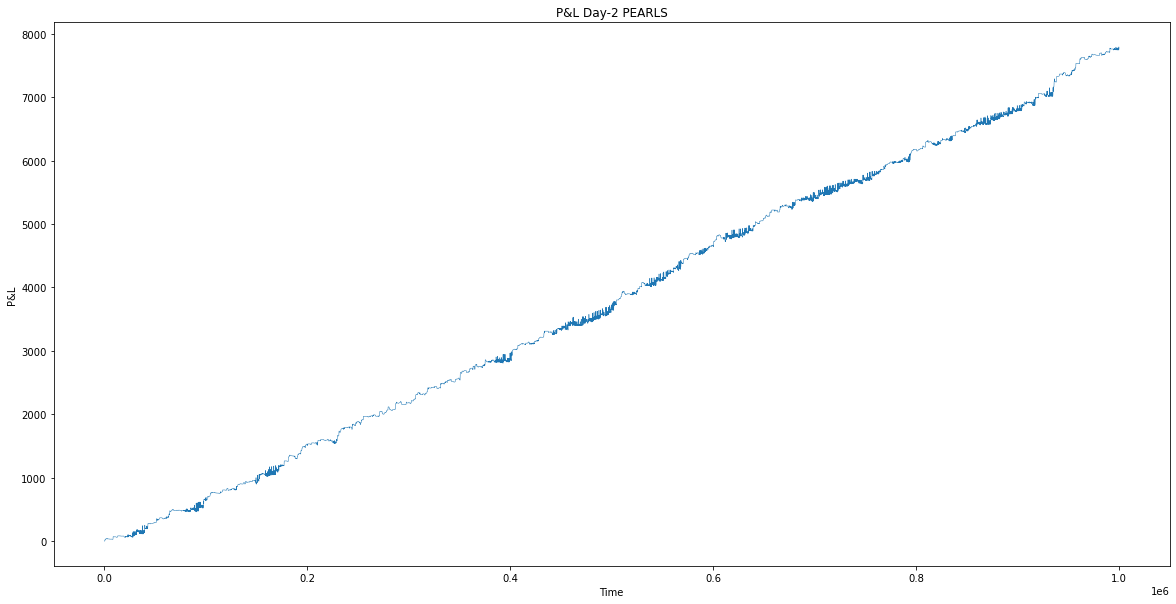

In [26]:
for day, data in outputs.items():
    for product in data.products:
        plt.plot(data.mtm_value['Value_'+product] , linewidth = 0.5)
        plt.xlabel('Time')
        plt.ylabel('P&L')
        plt.title('P&L Day' + str(day)+' '+product)
        plt.show()

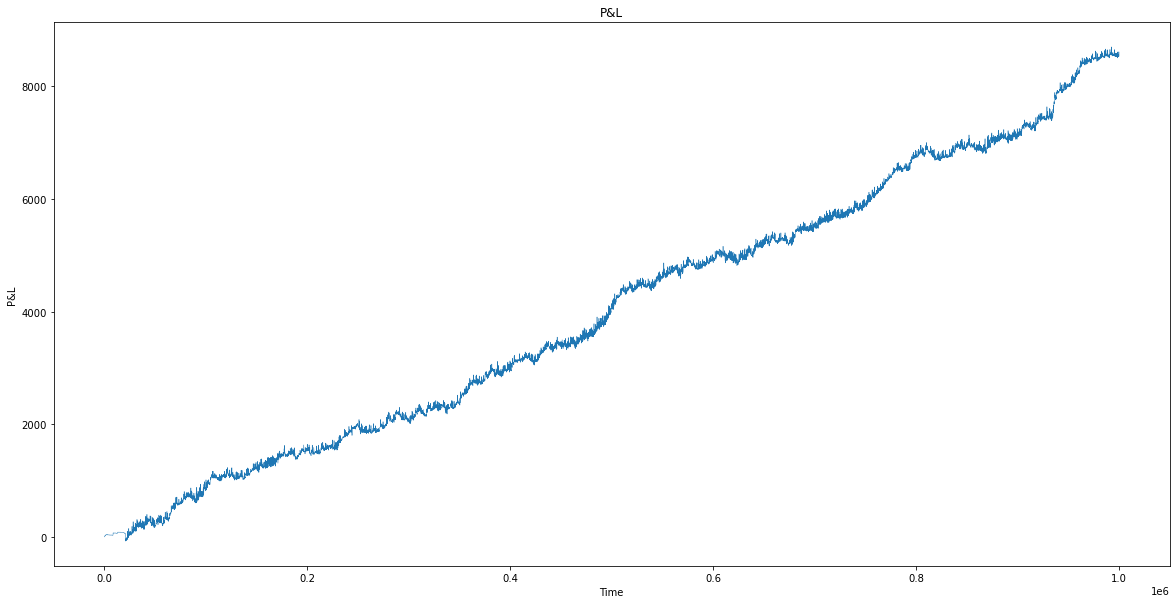

In [4]:
plt.plot(mtm_value['Value'] , linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('P&L')
plt.title('P&L')
plt.show()

In [31]:
mtm_value.tail(1)

,Cash,Value,Cash_BANANAS,Value_BANANAS,Cash_PEARLS,Value_PEARLS
Time,,,,,,
999900,167720,8656,99940,900,67780,7756


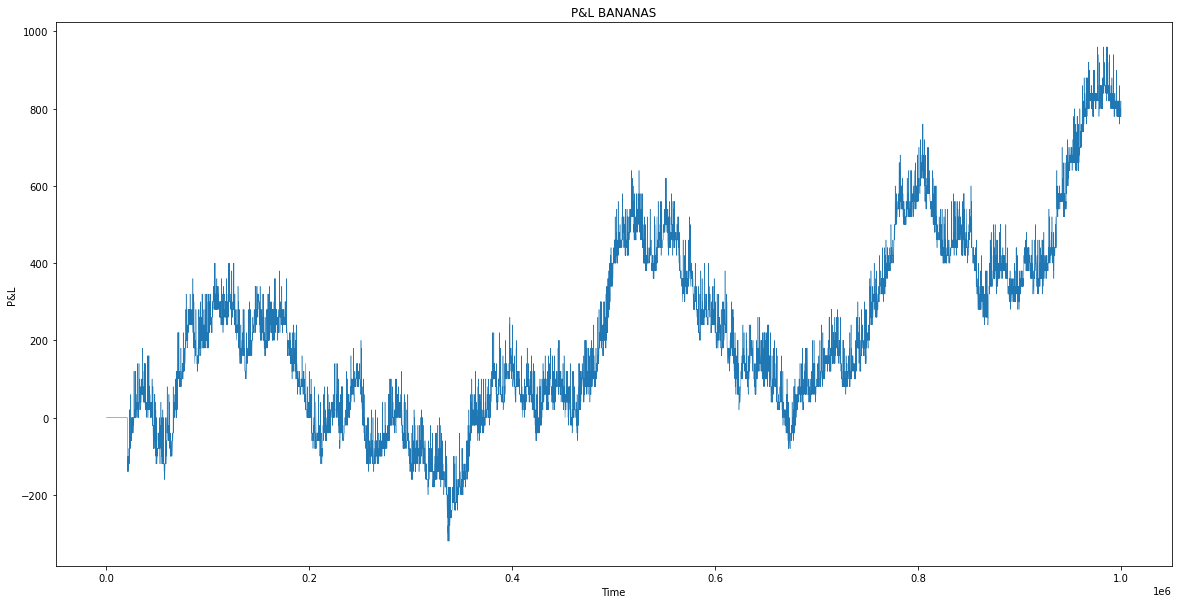

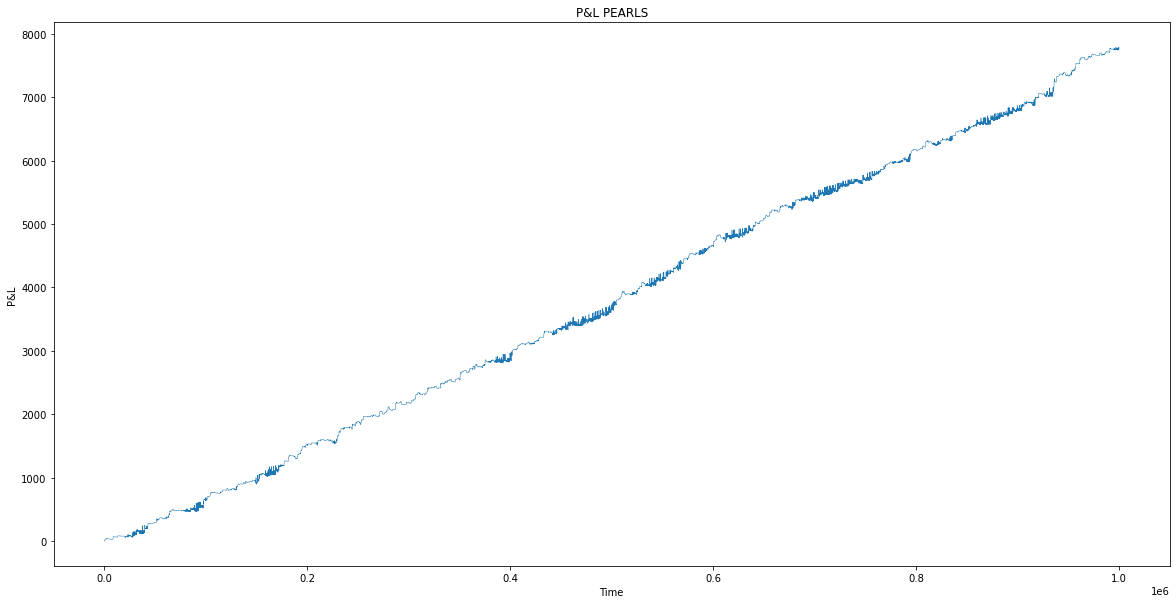

In [6]:
for product in products:
    plt.plot(mtm_value['Value_'+product] , linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('P&L')
    plt.title('P&L '+product)
    plt.show()